In [35]:
from numpy.random import rand
from numpy import *
from matplotlib.pyplot import plot, hist, scatter

# Exercicio 1

In [70]:
a, b = 4.21, 5.7
x, y = b/2, a

area_tri = x*y/2
area_tot = x*y

#pontos acima deste ângulo estão fora do triangulo
theta_c  = arctan(y/x)

In [71]:
def estimar_area(numero_de_propostas):
    """
    Estimar área do triângulo na primeira metade do quadrado.
    Atenção: depende das variáveis globais x, y e area_tot.
    """
    propostas_aceites = 0

    for _ in range(numero_de_propostas):
        rand_x = x*rand()
        rand_y = y*rand()
        theta  = arctan(rand_y/rand_x)
        if theta < theta_c:
            propostas_aceites = propostas_aceites + 1
            
    frac = propostas_aceites/numero_de_propostas
    return area_tot*frac

estimar_area(100_000)

5.9745330899999995

In [72]:
area_tri

5.99925

In [82]:
area_estimada = estimar_area(10_000)

print("atenção: áreas da primeira metade do retangulo")
print("Area exata:", area_tri)
print("Area estimada: ", area_estimada)
print("Erro rela(%):", abs(area_tri - area_estimada)*100/area_tri, "%")

atenção: áreas da primeira metade do retangulo
Area exata: 5.99925
Area estimada:  6.08443935
Erro rela(%): 1.4200000000000046 %


# Exercício 2

$$I = \int_{0}^{5} \frac{x+1}{x+5} dx $$

x estar entre x e x + dx:

$$p(x) = \frac{1}{5}$$

$$I = \int_{0}^{5} \frac{x+1}{x+5} \frac{p(x)}{p(x)} dx $$

$$I = \frac{1}{p(x)} \int_{0}^{5} \frac{x+1}{x+5} p(x)  dx $$

$$I = 5 <\frac{x+1}{x+5}> $$

In [62]:
def f(x):
    """Função a integrar. Aceita arrays, calcula pontualmente."""
    return (x+1)/(x+5)

X = 5*rand(100_000) 
areas = 5*f(X)
print("integral estimado = ", mean(areas))

integral estimado =  2.2269113649522065


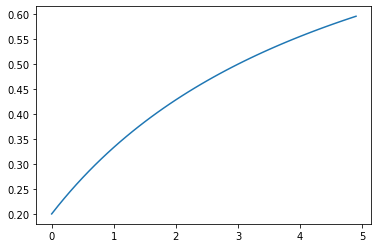

In [63]:
x0, xf, dx = 0, 5, .1
x = arange(x0, xf, dx)
plot(x, f(x))

# Exercicio 3

$$p(x) = 3 e^{-3x}$$

em que $x$ é maior ou igual a zero.

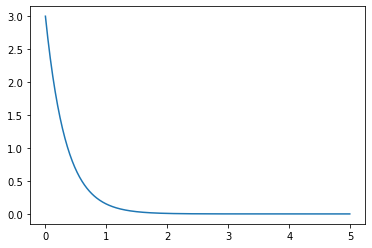

In [64]:
def p(x): 
    """Distribuição de probabilidade."""
    return 3*exp(-3*x)

x0, xf, dx = 0, 5, 0.01
x = arange(x0, xf, dx)
plot(x, p(x))

Calcular a função cumulutativa de $p(x)$:

$$P(x) = \int_{0}^{x} p(u) du$$

$$ P(x) = 3 \int_{0}^{x} e^{-3u} du $$

$$ P(x) = 3 \frac{1}{-3} \int_{0}^{x} e^{-3u}  d(-3u) $$

$$ P(x) =  1  - e^{-3x} $$

In [65]:
def P(x):
    """Função cumulutativa de p(x). Aceita arrays."""
    return 1 - exp(-3*x)

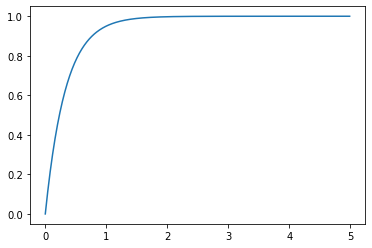

In [66]:
plot(x, P(x))

$$ P^{-1}(y) = - \ln(1 - y)/3 $$

$$ P^{-1}(y) = - \ln(y)/3 $$

In [67]:
def cumul_inv(y):
    """Funçao cumulutativa inversa. Aceita arrays."""
    return -log(y)/3

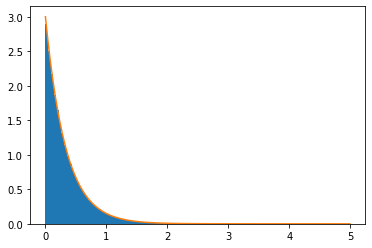

In [68]:
r = rand(1000_000)
hist(cumul_inv(r), bins = 200, density = True);
plot(x, p(x))